In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier,LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

In [2]:
news = pd.read_csv('WELFake_Dataset.csv')

In [3]:
news.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [4]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  72134 non-null  int64 
 1   title       71576 non-null  object
 2   text        72095 non-null  object
 3   label       72134 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


In [5]:
news.rename(columns={'Unnamed: 0' : 'ID'},inplace=True)
news.label = news.label.map({0:'FAKE',1:'REAL'})

In [6]:
news.head()

,ID,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,REAL
1,1,NaN,Did they post their votes for Hillary already?,REAL
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",REAL
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,FAKE
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",REAL


In [7]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      72134 non-null  int64 
 1   title   71576 non-null  object
 2   text    72095 non-null  object
 3   label   72134 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.2+ MB


Text(0, 0.5, 'News Type')

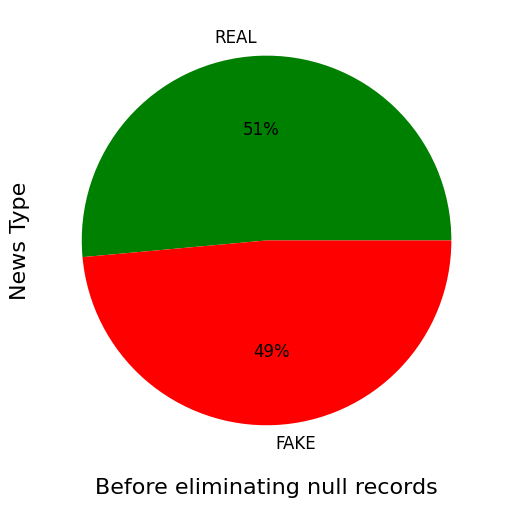

In [8]:
news.label.value_counts().plot(kind='pie',fontsize=12,figsize=(9,6),colors=['green','red'],autopct='%1.0f%%')
plt.xlabel('Before eliminating null records',size=16)
plt.ylabel('News Type',size=16)

In [9]:
news = news.dropna(subset=['text','title'])

In [10]:
news.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71537 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      71537 non-null  int64 
 1   title   71537 non-null  object
 2   text    71537 non-null  object
 3   label   71537 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.7+ MB


Text(0, 0.5, 'News Type')

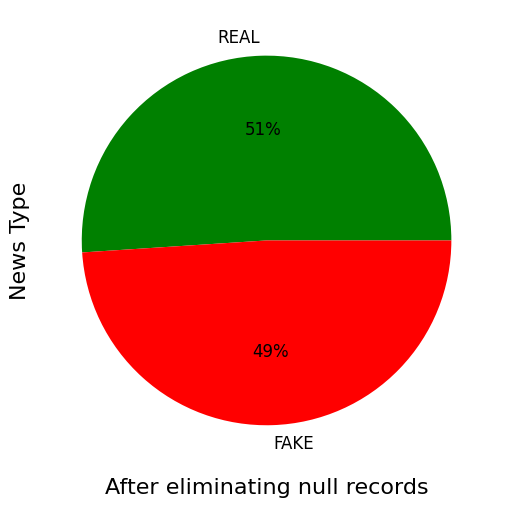

In [11]:
news.label.value_counts().plot(kind='pie',fontsize=12,figsize=(9,6),colors=['green','red'],autopct='%1.0f%%')
plt.xlabel('After eliminating null records',size=16)
plt.ylabel('News Type',size=16)

In [12]:
features = news.text
labels = news.label

In [49]:
features.shape

(71537,)

In [50]:
labels.shape

(71537,)

In [31]:
x_train,x_test,y_train,y_test = train_test_split(news['text'],labels,test_size=0.15,stratify=labels,random_state=1)

In [32]:
vectorizer = TfidfVectorizer(stop_words='english',max_df=0.7)

In [33]:
tfidf_train = vectorizer.fit_transform(x_train)
tfidf_test = vectorizer.transform(x_test)

In [51]:
tfidf_train.shape

(60806, 224002)

In [34]:
classifier = PassiveAggressiveClassifier(max_iter=100)

In [35]:
classifier.fit(tfidf_train,y_train)

PassiveAggressiveClassifier(max_iter=100)

In [36]:
predict_pac = classifier.predict(tfidf_test)

In [37]:
acc_score = accuracy_score(y_pred=predict_pac,y_true=y_test)
print(f'{round(acc_score*100,2)}%')

95.69%


In [38]:
print(classification_report(y_test,predict_pac))

              precision    recall  f1-score   support

        FAKE       0.96      0.95      0.96      5254
        REAL       0.95      0.96      0.96      5477

    accuracy                           0.96     10731
   macro avg       0.96      0.96      0.96     10731
weighted avg       0.96      0.96      0.96     10731



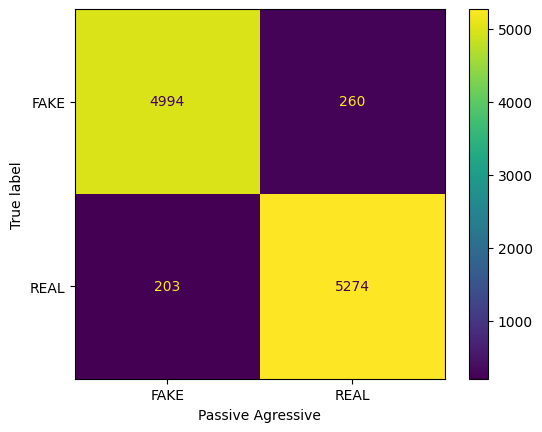

In [39]:
# matrix = confusion_matrix(y_true=y_test,y_pred=predict_pac,labels=labels)

display = ConfusionMatrixDisplay.from_predictions(y_test,predict_pac)
plt.xlabel('Passive Agressive')
plt.show()

In [40]:
logistic = LogisticRegression(max_iter=200)
logistic.fit(tfidf_train,y_train)
predict_lr = logistic.predict(tfidf_test)

In [41]:
acc_score_lr = accuracy_score(predict_lr,y_test)
print(f'{round(acc_score_lr*100,2)}%')

94.35%


In [42]:
print(classification_report(y_test,predict_lr))

              precision    recall  f1-score   support

        FAKE       0.96      0.93      0.94      5254
        REAL       0.93      0.96      0.95      5477

    accuracy                           0.94     10731
   macro avg       0.94      0.94      0.94     10731
weighted avg       0.94      0.94      0.94     10731



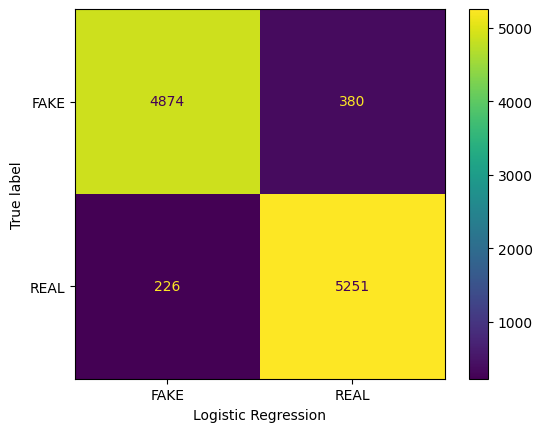

In [43]:
display = ConfusionMatrixDisplay.from_predictions(y_test,predict_lr)
plt.xlabel('Logistic Regression')
plt.show()

In [44]:
# svm = SVC()
# svm.fit(tfidf_train,y_train)
# predict_svm = svm.predict(tfidf_test)

In [45]:
# acc_score_svm = accuracy_score(predict_lr,y_test)
# print(f'{round(acc_score_svm*100,2)}%')

In [46]:
# print(classification_report(y_test,predict_svm))

In [47]:
# display = ConfusionMatrixDisplay.from_predictions(y_test,predict_svm)
# plt.xlabel('Support Vector Classifier')
# plt.show()

In [52]:
# rforest = RandomForestClassifier(n_estimators = 200, random_state=0)
# rforest.fit(tfidf_train,y_train)
# predict_rf = rforest.predict(tfidf_test)

KeyboardInterrupt: 

In [ ]:
# acc_score_rf = accuracy_score(predict_rf,y_test)
# print(f'{round(acc_score_rf*100,2)}%')

In [ ]:
# print(classification_report(y_test,predict_rf))

In [ ]:
# display = ConfusionMatrixDisplay.from_predictions(y_test,predict_rf)
# plt.xlabel('Random Forest')
# plt.show()

In [56]:
nb = MultinomialNB()
nb.fit(tfidf_train,y_train)
predict_nb = nb.predict(tfidf_test)

In [57]:
acc_score_nb = accuracy_score(predict_nb,y_test)
print(f'{round(acc_score_nb*100,2)}%')

86.53%


In [58]:
print(classification_report(y_test,predict_nb))

              precision    recall  f1-score   support

        FAKE       0.86      0.87      0.86      5254
        REAL       0.87      0.86      0.87      5477

    accuracy                           0.87     10731
   macro avg       0.87      0.87      0.87     10731
weighted avg       0.87      0.87      0.87     10731



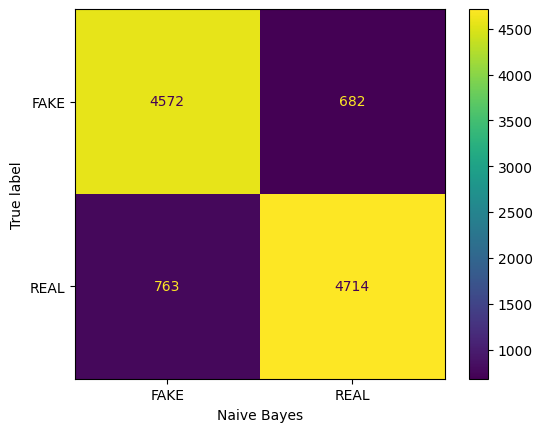

In [59]:
display = ConfusionMatrixDisplay.from_predictions(y_test,predict_nb)
plt.xlabel('Naive Bayes')
plt.show()

In [79]:
models = pd.DataFrame({
    'Models':['Passive Aggresive Classifier', 'Logistic Regression', 'Naive Bayes Classifier'],
    'Accuracy_score' :[round(acc_score*100,2), round(acc_score_lr*100,2), round(acc_score_nb*100,2)]
})

In [80]:
import seaborn as sns

In [81]:
models

,Models,Accuracy_score
0,Passive Aggresive Classifier,95.69
1,Logistic Regression,94.35
2,Naive Bayes Classifier,86.53


,Models,Accuracy_score
0,Passive Aggresive Classifier,95.69
1,Logistic Regression,94.35
2,Naive Bayes Classifier,86.53


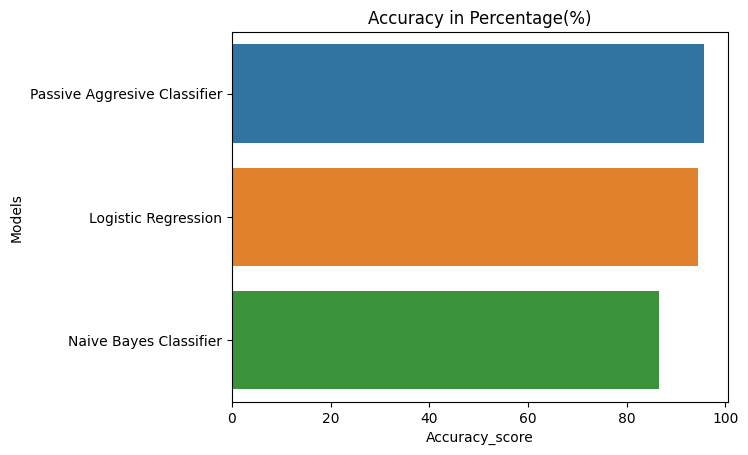

In [84]:
sns.barplot(x='Accuracy_score',y='Models',data=models)
plt.title('Accuracy in Percentage(%)')
models.sort_values(by='Accuracy_score', ascending=False)